In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import umap.plot
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(20,15)})

In [5]:
data = pd.read_csv("./masterG.edgelist_intindex_l80_r100_k10_e10_d128_p1_q1.emb",index_col=0, header=None, sep=" ")
data.head()

1        2         3         4         5         6         7    \
0                                                                          
1476  11.5113 -9.42316  0.205193 -0.421730  0.391075  0.203803  0.312765   
1681  11.9675 -9.89715  0.026774 -0.334155  0.264690  0.173380  0.212969   
1688  12.1559 -9.79754  0.107466 -0.420122  0.329272  0.285666  0.231937   
2654  11.8979 -9.78145  0.039081 -0.522496  0.444019  0.101167  0.278132   
1779  11.3464 -9.37431  0.100128 -0.473174  0.148115  0.156761  0.342334   

           8         9         10   ...       119       120       121  \
0                                   ...                                 
1476  0.223543  0.153782 -0.271372  ... -0.146295  0.069725 -0.001004   
1681  0.270030  0.156264 -0.310878  ... -0.070917  0.131309  0.015891   
1688  0.266056  0.178316 -0.298932  ... -0.045496 -0.048853 -0.034672   
2654  0.221812  0.078300 -0.435614  ... -0.003138 -0.177921 -0.026716   
1779  0.275606  0.257735 -0.314443  ...  0.024321 -0.135336  0.032746   

           122       123       124       125       126       127       128  
0                                                                           
1476 -0.061092 -0.003411  0.014797 -0.030596  0.092647  0.007980  0.043642  
1681 -0.027968  0.040749 -0.089891 -0.010556  0.081777 -0.002862 -0.056882  
1688 -0.007505  0.016051 -0.044503 -0.002161  0.087303 -0.010668  0.083149  
2654  0.013371 -0.021085 -0.093171  0.179920  0.051622  0.024253  0.157402  
1779 -0.000372 -0.045942 -0.076127  0.114983  0.018308  0.032266 -0.106640  

[5 rows x 128 columns]

In [67]:
labels = pd.read_csv("./masterG.edgelist_col12_nodes_meta.txt",index_col=0, header=None, sep="\t")
labels.head()

1   2
0                           
1                Sample: NaN
2                Sample: NaN
3                Sample: NaN
4                Sample: NaN
5  Sample_Taxon_Cluster: NaN

In [78]:
labeluniq = labels.iloc[:, 0].unique()
print(labeluniq)
col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

label_cols = labels.iloc[:, 0]
print(type(label_cols))
for i in np.arange(0, len(labeluniq),1):
    ind = np.where(labels.iloc[:, 0] == labeluniq[i])
    print(ind)
    label_cols.iloc[ind] = col[i]

#something above overwrites
labels = pd.read_csv("./masterG.edgelist_col12_nodes_meta.txt",index_col=0, header=None, sep="\t")
labeluniq = labels.iloc[:, 0].unique()
print(labeluniq)

['#1f77b4' '#ff7f0e' '#2ca02c' '#d62728' '#9467bd' '#8c564b' '#e377c2'
 '#7f7f7f' '#bcbd22']
<class 'pandas.core.series.Series'>
(array([   0,    1,    2,    3,   55,   56,   57,   58,   59,   60,   61,
         62,   63,   64,   65,   66,   67,   68,   69,   70,   71,   72,
         73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
         84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,
         95,   96,   97,   98,   99,  100,  101,  102,  103,  104,  105,
        106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,
        117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,
        128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
        139,  140,  141,  142,  143,  144,  145,  146,  147,  148,  149,
        150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160,
        161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,
        172,  173,  174,  219,  220,  224,  262,  263,  389,  390, 

In [79]:
print(label_cols)

0
1         #1f77b4
2         #1f77b4
3         #1f77b4
4         #1f77b4
5         #ff7f0e
           ...   
134010    #e377c2
134011    #ff7f0e
134012    #8c564b
134013    #e377c2
134014    #e377c2
Name: 1, Length: 134014, dtype: object


In [80]:
print(labeluniq)

['Sample:' 'Sample_Taxon_Cluster:' 'Ph_' 'Isolate:' 'Top_' 'SMeas_Trait:'
 'EE_Bicluster:' 'Water_Measurement:' 'Sediment_Measurement:']


In [9]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)
embedding.shape

(134014, 2)

In [52]:
#sizes = np.ones(mapper.shape[0])
#print(sizes)
fig, ax = plt.subplots()
ax = fig.add_subplot(111, facecolor='black')

scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1], s=2, c=label_cols)#, marker='^', c=5
    
plt.title('UMAP projection of first ENIGMA graph embeddings', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of first ENIGMA graph embeddings')

Sample:
Sample_Taxon_Cluster:
Ph_
Isolate:
Top_
SMeas_Trait:
EE_Bicluster:
Water_Measurement:
Sediment_Measurement:


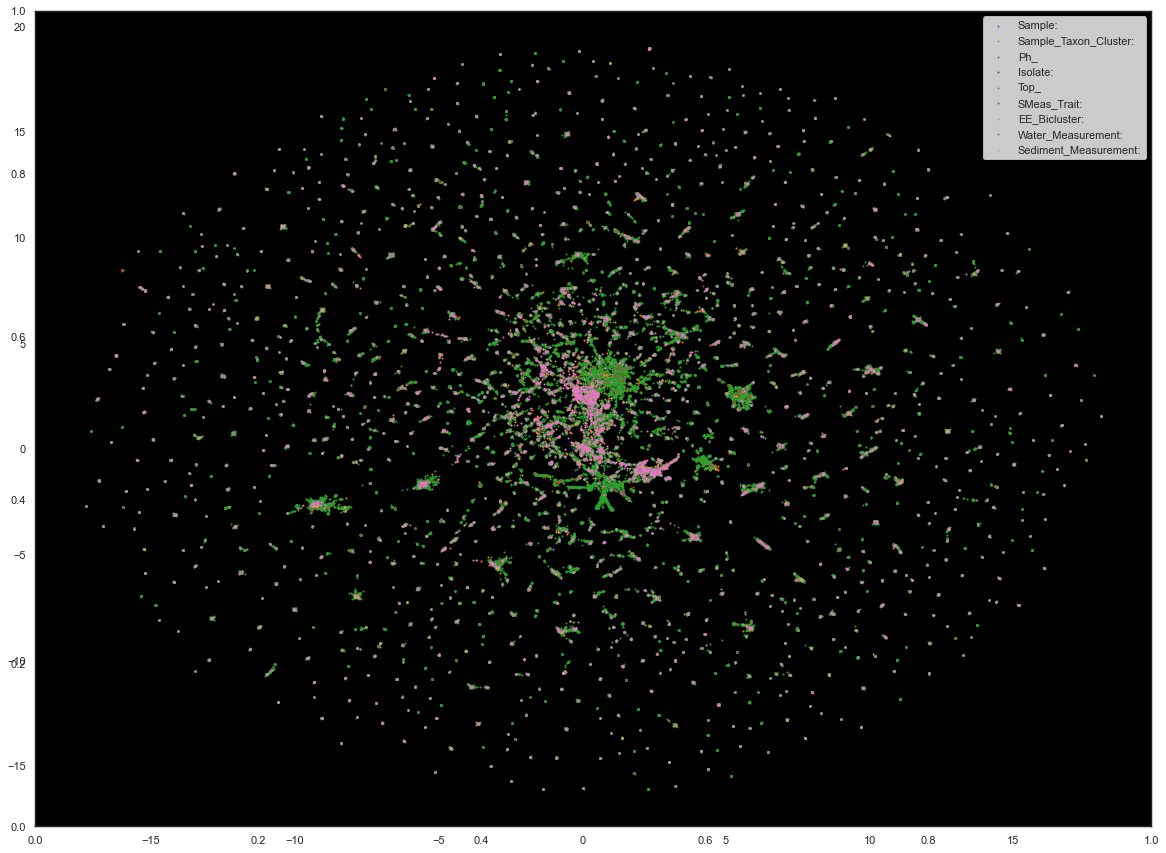

In [85]:
fig, ax = plt.subplots()
ax = fig.add_subplot(111, facecolor='black')


for i in np.arange(0, len(labeluniq),1):
    print(labeluniq[i])
    #print(col[i])
    ind = np.where(labels.iloc[:, 0] == labeluniq[i])
    #print(ind)
    ax.scatter(embedding[ind, 0],
    embedding[ind, 1], s=1, c=col[i], label=labeluniq[i], facecolor='black')

ax.legend()
#ax.grid(True)

plt.show()

In [86]:
plt.savefig('ENIGMA_graph_embeddings_v2.png')
plt.savefig('ENIGMA_graph_embeddings_v2.pdf')

<Figure size 1440x1080 with 0 Axes>

In [72]:
labels.iloc[:, 0].head()

0
1    #1f77b4
2    #1f77b4
3    #1f77b4
4    #1f77b4
5    #ff7f0e
Name: 1, dtype: object

In [7]:
mapper = umap.UMAP().fit(data)

In [73]:
labels.iloc[:, 0].shape

(134014,)

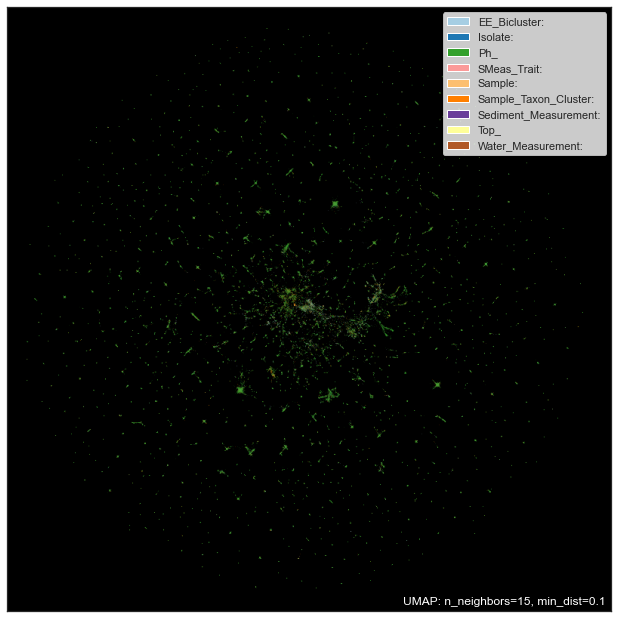

In [8]:
umap.plot.points(mapper, labels=labels.iloc[:, 0], color_key_cmap='Paired', background='black')#, theme='fire')

In [12]:
from bokeh.plotting import show, save, output_notebook, output_file

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
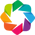

For instance, instead of opts('Points (size=5)') use opts.defaults(opts.Points(size=5))
For instance, instead of opts('Points (size=5)') use opts.defaults(opts.Points(size=5))


ValueError: The type of ``plot_to_show`` was not valid, or not understood.

In [20]:
p = umap.plot.interactive(mapper, labels=labels.iloc[:, 0], point_size=2)
#output_notebook()
#show(p)
umap.plot.show(p)

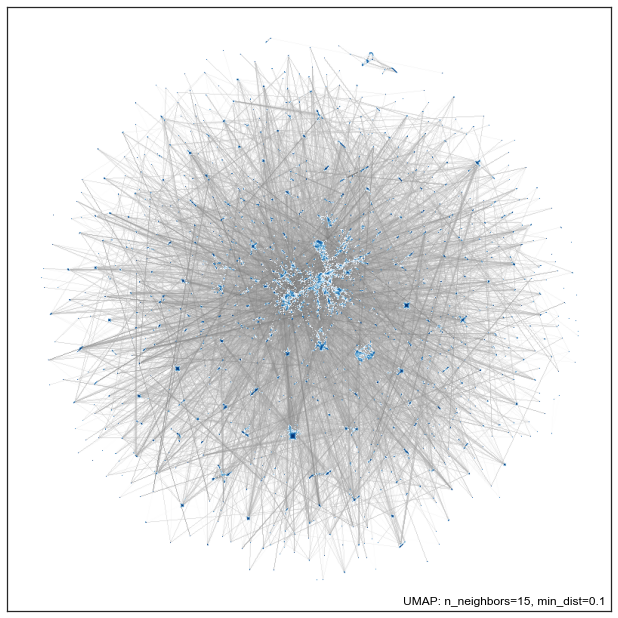

In [21]:
umap.plot.connectivity(mapper, show_points=True)

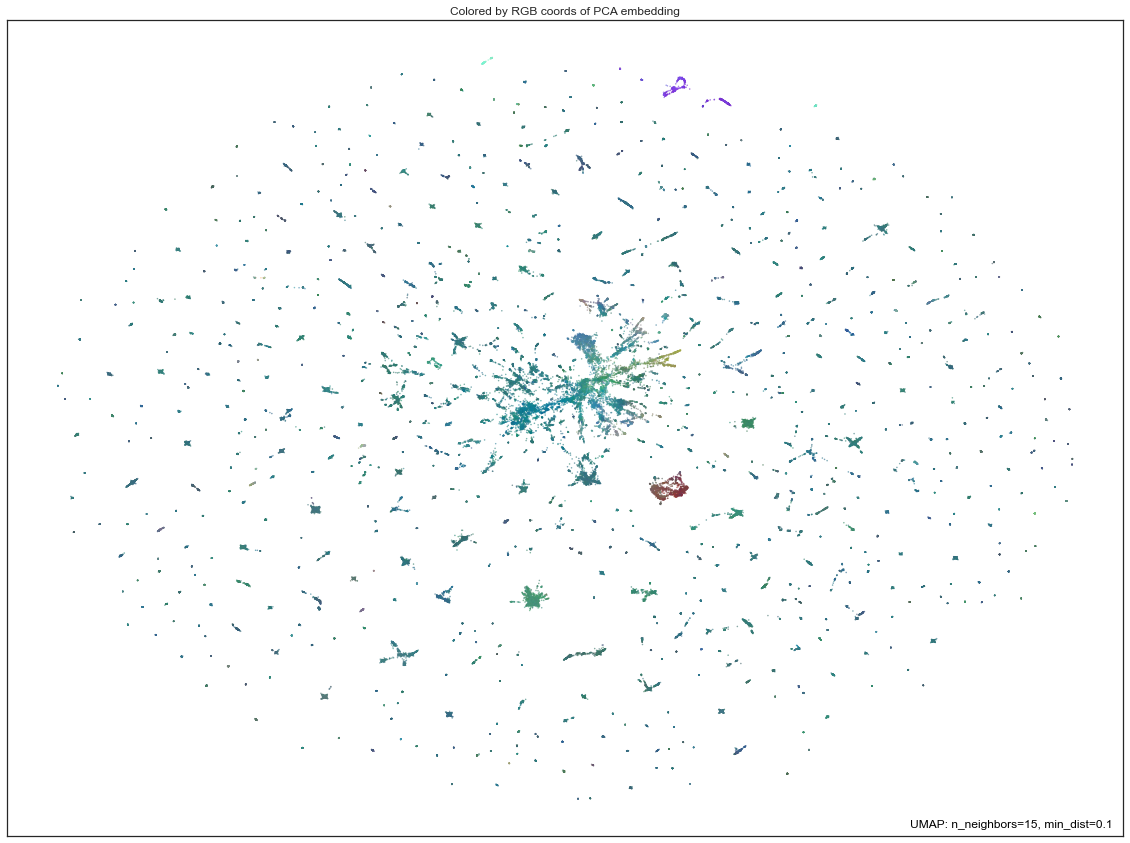

In [22]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

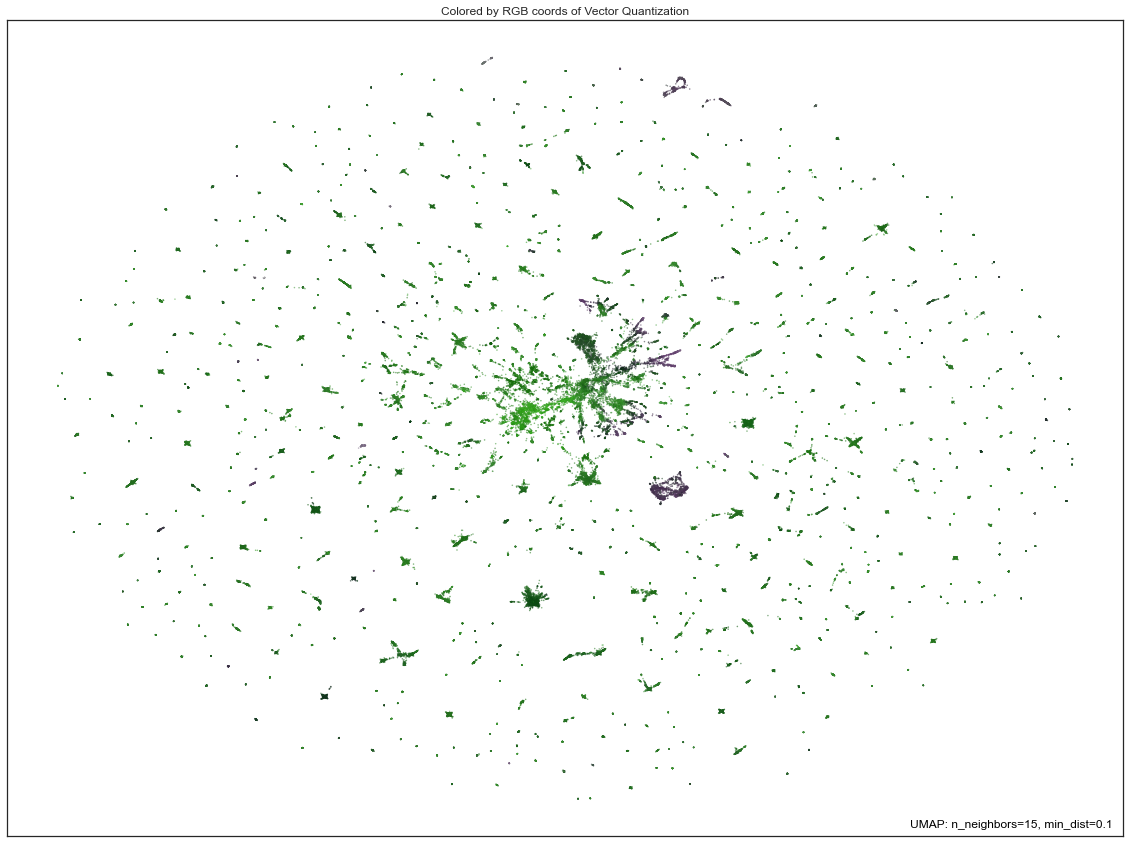

In [23]:
umap.plot.diagnostic(mapper, diagnostic_type='vq')

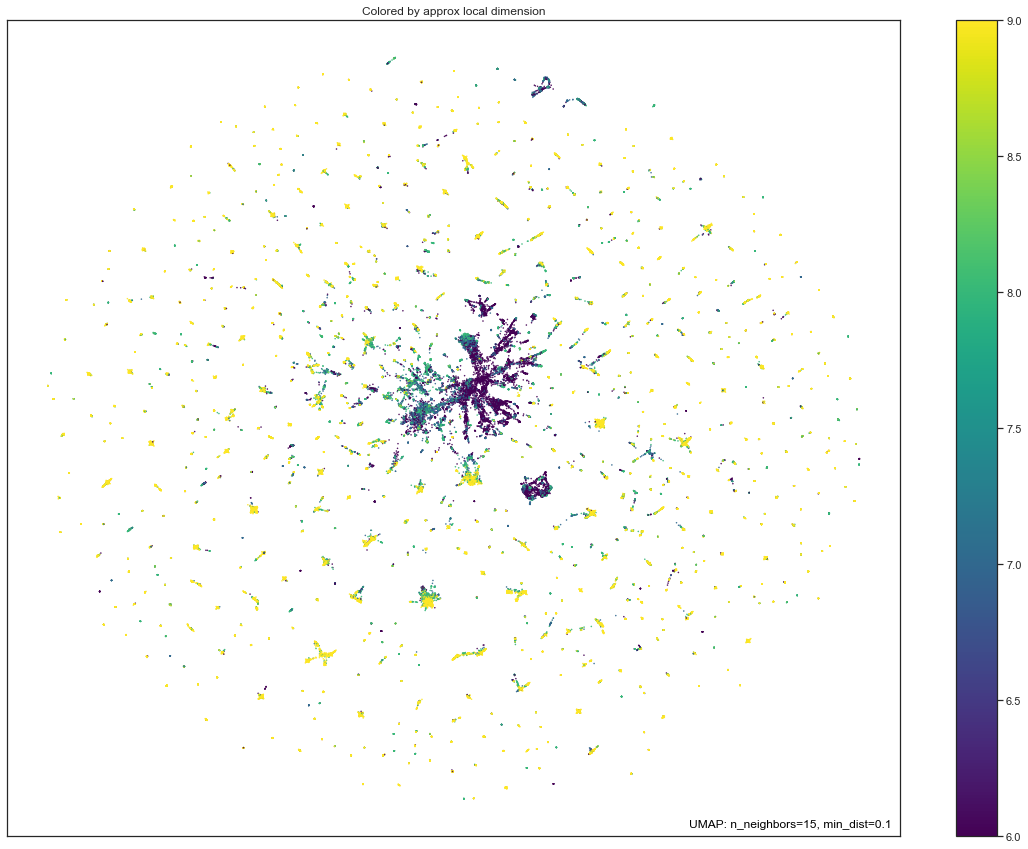

In [24]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')

In [9]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/plot.py:850: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/marcin/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-010071139bb5>", line 1, in <module>
    umap.plot.connectivity(mapper, edge_bundling='hammer')
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/plot.py", line 853, in connectivity
    edges = bd.hammer_bundle(point_df, edge_df, weight="weight")
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/param/parameterized.py", line 2812, in __new__
    return inst.__call__(*args,**params)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/datashader/bundling.py", line 497, in __call__
    edge_segments = compute(*edge_segments)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/dask/base.py", line 444, in compute
  

KeyboardInterrupt: 